In [182]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [183]:
col_names = ['date','rise','Доходность ОФЗ по сроку до 1 года','Ключевая ставка','Ставка по вкладам в долларах до 1 года','StavkaVRub','Нефть марки Юралс, долл./барр','Индекс потребительских цен, ед.','М0, руб','М2, руб','Курс доллара к рублю, руб','Номинальная средняя з/п, руб']
test = pd.read_csv("/home/man/Desktop/bst_ds.csv",sep=';', header = 0, decimal=',', names=col_names, usecols=col_names)
df1 = pd.DataFrame(data=test)
df1['date'] = pd.to_datetime(df1['date'],format='%d.%m.%Y')
df1['month'] = df1['date'].dt.month
df1['year'] = df1['date'].dt.year

#separate NULL values from 'rise' feature:
test_data = df1[df1.rise.isnull()]
df1.dropna(inplace=True)

#create the "y_train"
# "y_train" means rows from the df1.rise with no NULL values
y_train = df1.rise
# "X_train" means data frame (df1 )without df1.rise feature with non NULL values
X_train = df1.drop(['date','rise','year'],axis=1) 

In [184]:
# Saving feature names for later use
feature_list = list(X_train.columns)
# Convert to numpy array
X_train.astype(float)

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,StavkaVRub,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month
0,5.2,7.8,2.9,4.5,96.0,106.2,5532900.0,19308.0,30.0,20669.0,1.0
1,5.1,8.0,3.1,4.4,104.0,107.0,5613700.0,19537.0,29.0,20680.0,2.0
2,5.0,8.0,3.1,4.2,114.0,107.7,5647000.0,19789.0,28.0,22673.0,3.0
3,4.6,8.0,2.6,4.1,123.0,108.1,5863400.0,20021.0,28.0,22519.0,4.0
4,4.8,8.3,2.6,4.1,114.0,108.6,5893400.0,20161.0,28.0,22779.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
67,9.3,10.5,0.9,6.8,46.0,163.0,8517600.0,36170.0,65.0,35405.0,8.0
68,9.0,10.0,0.8,6.0,46.0,163.3,8557800.0,36149.0,65.0,35843.0,9.0
69,9.0,10.0,0.7,6.0,50.0,164.0,8459500.0,36051.0,63.0,35749.0,10.0
70,8.9,10.0,0.7,6.6,46.0,164.8,8425200.0,36433.0,64.0,36195.0,11.0


In [185]:
# Using Skicit-learn to split KNOWN data into training and testing sets, to research model on KNOWN data at first
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#val - cutting from "validate"
train_X, val_X, train_y, val_y = train_test_split(train_features, train_labels,test_size = 0.25, random_state = 42)

In [186]:

#Normalization
train_y = (train_y-min(train_y))/(max(train_y)-min(train_y))
val_y = (val_y-min(val_y))/(max(val_y)-min(val_y))

#for feature in feature_list:
#    train_X[feature] = (train_X[feature] - min(train_X[feature])) / (max(train_X[feature]) - min(train_X[feature]))
#    val_X[feature] = (val_X[feature] - min(val_X[feature])) / (max(val_X[feature]) - min(val_X[feature]))

In [187]:
from tensorflow.keras import callbacks

#define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.1183 - val_loss: 21.0836
Epoch 2/25
1/1 [==============================] - 0s 227ms/step - loss: 1.1602 - val_loss: 15.1976
Epoch 3/25
1/1 [==============================] - 0s 155ms/step - loss: 1.1455 - val_loss: 12.6934
Epoch 4/25
1/1 [==============================] - 0s 182ms/step - loss: 1.2781 - val_loss: 11.2674
Epoch 5/25
1/1 [==============================] - 0s 256ms/step - loss: 1.1724 - val_loss: 10.2735
Epoch 6/25
1/1 [==============================] - 0s 221ms/step - loss: 1.3643 - val_loss: 9.5635
Epoch 7/25
1/1 [==============================] - 0s 228ms/step - loss: 0.9113 - val_loss: 8.8510
Epoch 8/25
1/1 [==============================] - 0s 232ms/step - loss: 0.9412 - val_loss: 8.2431
Epoch 9/25
1/1 [==============================] - 0s 238ms/step - loss: 0.8076 - val_loss: 7.7326
Epoch 10/25
1/1 [==============================] - 0s 153ms/step - loss: 0.9900 - val_loss: 7.2584
Epoch 11/25
1/1 [

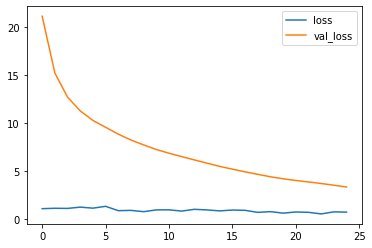

In [188]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = [11]),
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(32, activation='elu'),    
    layers.BatchNormalization(),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=65,
    epochs=25,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [189]:
# Generate a prediction using model.predict() 
# and calculate it's shape:
X_test = test_data.drop(['date','rise','year'],axis=1) 
print("Generate a prediction")
y_pred = model.predict(X_test)

Generate a prediction


In [190]:
#Unnormilize back
y_pred = y_pred*(max(df1.rise)-min(df1.rise)) + min(df1.rise)

test_data.loc[test_data.rise.isnull(), "rise"] = y_pred

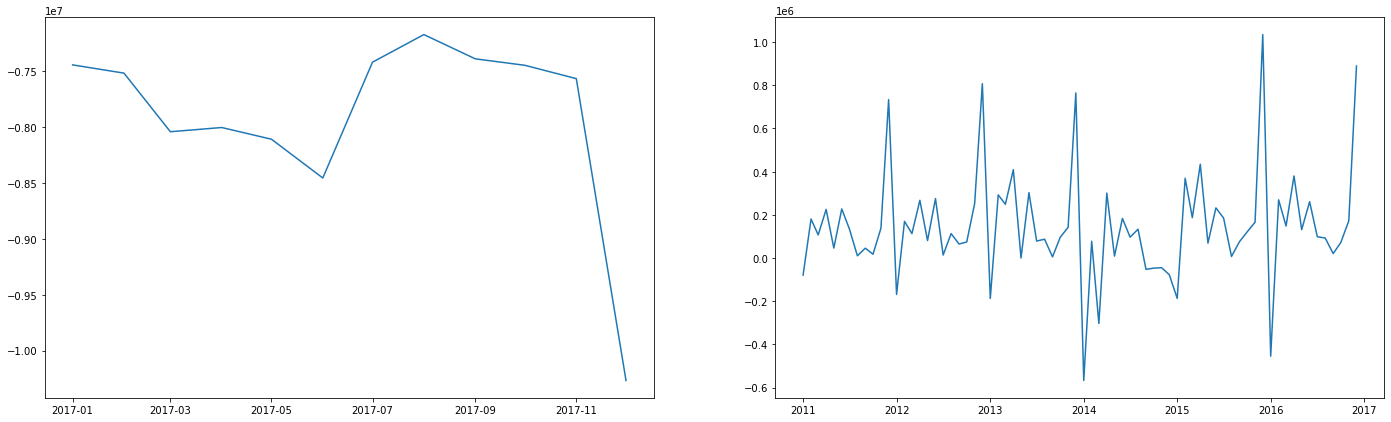

In [191]:
x1 = [i for i in test_data['date']]
y1 = [f for f in test_data['rise']]
x2 = [i for i in df1['date']]
y2 = [f for f in df1['rise']]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)